In [1]:
# import cv2 
from __future__ import print_function
import numpy as np 
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import matplotlib.image as mpimg

In [2]:
# Origin gif 
# paths = sorted(os.listdir("data/imgs"))[1:]
# paths = [os.path.join("data/imgs",path) for path in paths]
# paths = [ Image.open(i) for i in paths]
# imageio.mimsave("origin.gif", paths, fps=10)

In [3]:
# MAX_FEATURES = 5000
# GOOD_MATCH_PERCENT = 0.2

def alignImages(im1, im2):
    
    # Convert images to grayscale
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    #orb = cv2.AKAZE_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None) # keypoint, descriptor를 계산
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    
  
    goodmatches = matches
    #matches = matches[:numGoodMatches]
    matches = [x for x in matches if x.distance <DISTANCE_THRESH]
    # Draw top matches

    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)
    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography

    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
    
    return h
#     print(h)
#     height, width, channels = im2.shape

#     im1Reg = cv2.warpPerspective(im1, h, (width, height))
    
#     return im1Reg, h



  

In [4]:
path = "data"
f_bg = os.path.join(path, "blackboard.jpg")
f = os.path.join(path, "linear_alg/image_2_0.jpg")
###### root --
###########날짜--
###############--images.jpg

# 칠판 및 첫번째 프레임 로딩

In [5]:
MAX_FEATURES = 5000
GOOD_MATCH_PERCENT = 0.1
DISTANCE_THRESH = 45
k=2
res = 4


im_bg = cv2.imread(f_bg, cv2.IMREAD_COLOR)
im_bg=cv2.resize(im_bg,dsize=(720,480),interpolation=cv2.INTER_LINEAR)

im = cv2.imread(f, cv2.IMREAD_COLOR)
im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)



# 칠판 point 찍기

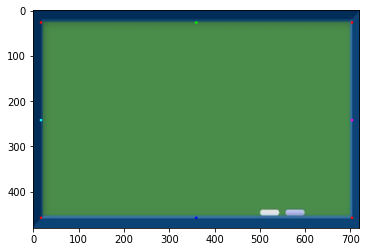

In [6]:
import copy
new_img = copy.deepcopy(im_bg)
for i in range(5):
    for j in range(5):
        new_img[25+i, 15+j] = [255,0,0]
        new_img[25+i, 700+j] = [255,0,0]
        new_img[455+i, 15+j] = [255,0,0]
        new_img[455+i, 700+j] = [255,0,0]
        
        new_img[25+i, 357+j] = [0,255,0]
        new_img[455+i, 357+j] = [0,0,255]
        new_img[240+i, 15+j] = [0,255,255]
        new_img[240+i, 700+j] = [255,0,255]
    
plt.imshow(new_img)

# 첫번째 frame point찍기

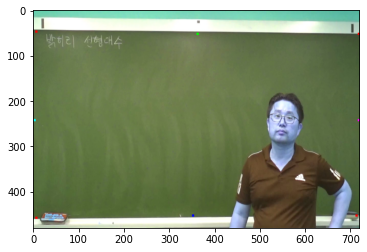

In [7]:
import copy
new_img = copy.deepcopy(im)
for i in range(5):
    for j in range(5):
        new_img[45+i, 5+j] = [255,0,0]
        new_img[50+i, 715+j] = [255,0,0]
        new_img[455+i, 5+j] = [255,0,0]
        new_img[450+i, 710+j] = [255,0,0]
        
        new_img[50+i, 360+j] = [0,255,0]
        new_img[450+i, 350+j] = [0,0,255]
        new_img[240+i, 1+j] = [0,255,255]
        new_img[240+i, 715+j] = [255,0,255]
    
plt.imshow(new_img)

# 첫번째 frame registration

In [9]:
# Extract location of good matches
points1 = np.zeros((4, 2), dtype=np.float32)
points2 = np.zeros((4, 2), dtype=np.float32)

# points1= np.array([[25.,700], [25, 357], [455, 357],[240, 15],[455,700],[455,15]])
points1= np.array([[25.,15], [25, 700],[455, 15],[455, 700],[25,357],[455,357],[240,15],[240,700]])
points1[:,[0,1]] = points1[:,[1,0]]
points2 = np.array([[45.,5], [50, 715], [455, 5],[450, 710],[50,360], [450, 350],[240,1],[240,715]])
# points2 = np.array([[30.,650], [25, 425], [460, 425],[240, 125],[440,640], [480, 110]])
points2[:,[0,1]] = points2[:,[1,0]]

# Find homography

H, mask = cv2.findHomography(points2, points1, 0)

print(H)
height, width, channels = im.shape


# for i in range(480):
#     for j in range(720):
#         if dst[i,j]!=255:
#             im[i,j]=0

# im1Reg = cv2.warpPerspective(im, H, (width, height))


# plt.imshow(im1Reg)

[[ 9.63934587e-01  1.74589918e-02  8.18367082e+00]
 [-1.72436983e-03  1.07075888e+00 -2.35534748e+01]
 [-6.97605915e-06  1.56505912e-05  1.00000000e+00]]


# 전체 jpg에 대한 registration

In [12]:
#registration
f = os.listdir("data/linear_alg")
flist = sorted(f, key = lambda x : int(x.split("_")[2][:-4]))

path = "data/linear_alg"

im_Regs=[]
imgs=[]
edges=[]

f1=None
h=None

for idx, f in enumerate(flist):
    if f1 is None:
        # 첫번째 file 읽어오는 것 (기존에 첫번째 file에 대해 registration을 했기 때문에 따로 불러옴)
        f1 = os.path.join(path, f)
        
        im = cv2.imread(f1, cv2.IMREAD_COLOR)
        im=cv2.resize(im,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
        # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        continue
    
    # 첫번째 이후의 file 읽어옴
    f2 = os.path.join(path, f)

    im2 = cv2.imread(f2, cv2.IMREAD_COLOR)
    im2=cv2.resize(im2,dsize=(720,480),interpolation=cv2.INTER_LINEAR)
    
    # alignment(첫번째 frame에 대해)
    h_im=alignImages(im2,im) #im2를 im1으로 alignment
    
    
    if h is None:
        h = H
    else:
        h = H
#         h = h_im@H
#         im = im2
    
    #transformation matrix(h)를 통해 Warping(=transformation matrix를 image에 곱하는것 -> align된 이미지 만들어내기 위함)
    im2_Reg = cv2.warpPerspective(im2, h, (width, height)) # 현재 frame에 대한 결과
    
    im_Regs.append(im2_Reg) # registration된 이미지 전부 저장
    imgs.append(Image.fromarray(cv2.cvtColor(im2_Reg, cv2.COLOR_BGR2RGB))) # gif를 만들기 위함

imageio.mimsave("result4.gif", imgs, fps=4) #gif 생성

### 사람 지우기

In [13]:
edges=[]

#Registration된 이미지에서 canny edge detector진행
for img in im_Regs:
    edge = cv2.Canny(img,50,150)
    edges.append(edge)
    
#사람 지우기?
new_edges=[]
for idx in range(len(edges)):
    new_edge = np.median(edges[max(0, idx-10):min(idx+11, len(edges))], 0 ) # frame을 앞에 10개, 뒤에 10개를 가져오고 그것을 median
    new_edges.append(new_edge)


### edge 두껍게

In [14]:
imgs = []
for idx, img in enumerate(im_Regs):
    
    kernel = np.ones((1,1))
    kernel = kernel/len(kernel**2)
    dst = cv2.filter2D(new_edges[idx], -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
    dst = dst>0
    dst= dst*255
    
    
    temp_img = copy.deepcopy(img)
    temp_img[dst!=255] = 0
    
    res = copy.deepcopy(im_bg)
    res[25:455, 15:700] = 0
    res[25:455, 15:700] = temp_img[25:455, 15:700] * (temp_img[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)

    imgs.append(Image.fromarray(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)))

imageio.mimsave("result5.gif", imgs, fps=10)

### edge video 생성

In [15]:
imgs = []
imgs2 = []


for idx, img in enumerate(im_Regs):
    
    
    #선두께 정하기 (by kernel)
    kernel = np.ones((1,1))
    kernel = kernel/len(kernel**2)
    dst = cv2.filter2D(new_edges[idx], -1, kernel) # -1은 입력 영상과 동일한 데이터의 출력 영상 생성
    dst = dst>0
    dst= (dst*255).reshape(480,720,1)

    dst= np.concatenate([dst,dst,dst],2)
    
    #결과물 생성
    res = copy.deepcopy(im_bg) # 배경
    res[25:455, 15:700] = dst[25:455, 15:700] # 칠판을 제외한 중앙 부분을 결과물로 채움 (좌표 : 왼쪽 위, 오른쪽 아래)
    
    imgs.append(Image.fromarray(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)))
    imgs2.append(res)

imageio.mimsave("result6.gif", imgs, fps=10)


In [16]:
value =[]
 
#pixel histogram
for i in imgs2:
    value.append(i[25:455, 15:700].sum()/255)
    
#감소구간 찾기
idxs =[]
pre = None
thr = 500
temp_list =[]

for idx, val in enumerate(value):
    if pre==None:
        temp_list.append(0)
        pre=val
        continue
    if pre-val>thr:
        temp_list.append(1)
    else:temp_list.append(0)
    pre=val
    
    
#변하는 마지막부분 idx
pre = 0
lst = [0]
for idx, temp in enumerate(temp_list):
    if temp == 0 and pre == 1:
        lst.append(idx)
    pre = temp
        

In [17]:
for i in range(len(lst)-1):
    fin=np.mean(imgs2[lst[i]:lst[i+1]],0)

    res = copy.deepcopy(im_bg)
    res[25:455, 15:700] = 0
    res[25:455, 15:700] = fin[25:455, 15:700] * (fin[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)
    res[25:455, 15:700] = (res[25:455, 15:700].sum(2)!=0).reshape(430,685,-1)*255
    cv2.imwrite("res{}.jpg".format(i), res)
